# Import Packages

In [73]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Number of Images

In [3]:
print(len(os.listdir('dataset/train/police')))
print(len(os.listdir('dataset/train/regular')))
print(len(os.listdir('dataset/validate/police')))
print(len(os.listdir('dataset/validate/regular')))

2091
2160
923
926


# Design a model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Image Data Generator

In [69]:
TRAINING_DIR = "dataset\\train\\"
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "dataset\\validate\\"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 4239 images belonging to 2 classes.
Found 1825 images belonging to 2 classes.


# Run the model

In [76]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/20
43/43 [==============================] - 245s 6s/step - loss: 0.2064 - acc: 0.9196 - val_loss: 0.2496 - val_acc: 0.9112
Epoch 2/20
43/43 [==============================] - 206s 5s/step - loss: 0.1948 - acc: 0.9226 - val_loss: 0.2296 - val_acc: 0.9107
Epoch 3/20
43/43 [==============================] - 205s 5s/step - loss: 0.1863 - acc: 0.9276 - val_loss: 0.2525 - val_acc: 0.9134
Epoch 4/20
43/43 [==============================] - 210s 5s/step - loss: 0.1879 - acc: 0.9259 - val_loss: 0.2476 - val_acc: 0.9145
Epoch 5/20
43/43 [==============================] - 213s 5s/step - loss: 0.1994 - acc: 0.9240 - val_loss: 0.2368 - val_acc: 0.9195
Epoch 6/20
43/43 [==============================] - 217s 5s/step - loss: 0.1839 - acc: 0.9302 - val_loss: 0.2705 - val_acc: 0.8942
Epoch 7/20
43/43 [==============================] - 198s 5s/step - loss: 0.1855 - acc: 0.9196 - val_loss: 0.2162 - val_acc: 0.9151
Epoch 8/20
43/43 [==============================] - 226s 5s/step - loss: 0.1905 - a

# Plot accuracy and loss graph

<Figure size 432x288 with 0 Axes>

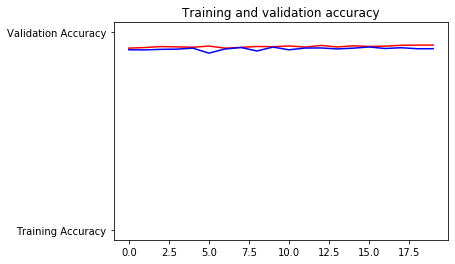

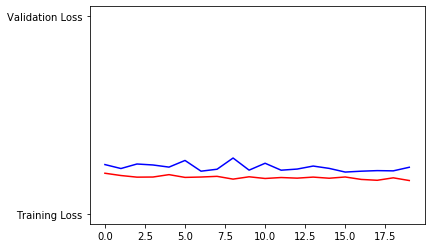

<Figure size 432x288 with 0 Axes>

In [77]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()
